In [3]:
import pandas as pd

In [14]:
df_man_city_fixtures=pd.read_csv('../data/raw/man_city_fixtures_2023_2024.csv')
df_man_city_fixtures=df_man_city_fixtures[df_man_city_fixtures['Comp']=='Premier League']
df_man_city_fixtures.drop(['Notes','Match Report','Referee','Attendance'],axis=1,inplace=True)
df_man_city_fixtures.to_csv('../data/cleaned/man_city_cleaned_fixtures.csv',index=False)

In [51]:
df_haaland_match_logs=pd.read_csv('../data/raw/haaland_match_logs_2023_2024.csv',header=0)
df_haaland_match_logs.columns=df_haaland_match_logs.iloc[0]
df_haaland_match_logs=df_haaland_match_logs[1:]
df_haaland_match_logs=df_haaland_match_logs[df_haaland_match_logs['Comp']=='Premier League']
df_haaland_match_logs.drop(['Match Report'],axis=1,inplace=True)
# Rename the last two columns as 'takeons_attm' and 'takeons_succ'
df_haaland_match_logs.columns.values[-2] = 'TakeonsAtt'
df_haaland_match_logs.columns.values[-1] = 'TakeonsSucc'

# Rename 'cmp' to 'passComp' and 'att' to 'passAttm'
df_haaland_match_logs.rename(columns={'Cmp': 'PassCmp', 'Att': 'PassAttm','Cmp%':'PassCmp%','PrgP':'PrgPass','PrgC':'PrgCarries'}, inplace=True)

# Joining
df_cleaned_haaland_match_logs=pd.merge(df_haaland_match_logs,df_man_city_fixtures,on=['Date','Day','Comp','Round','Venue','Opponent'],how='right')

df_cleaned_haaland_match_logs.drop(['Result_x'],axis=1,inplace=True)

df_cleaned_haaland_match_logs.rename(columns={'xG_y':'Game_xG','xG_x':'Player_xG'},inplace=True)

df_cleaned_haaland_match_logs['Squad']=df_cleaned_haaland_match_logs['Squad'].replace([None],'Manchester City')
df_cleaned_haaland_match_logs['Start']=df_cleaned_haaland_match_logs['Start'].replace([None],'N')

df_cleaned_haaland_match_logs['Pos']=df_cleaned_haaland_match_logs['Pos'].replace([None,'On matchday squad, but did not play'],'Did not play')

df_cleaned_haaland_match_logs=df_cleaned_haaland_match_logs.replace(['On matchday squad, but did not play'],0)

df_cleaned_haaland_match_logs.fillna('0',inplace=True)

df_cleaned_haaland_match_logs.to_csv('../data/cleaned/haaland_cleaned_match_logs.csv')

In [1]:
import pandas as pd

# Load the data
df_goals = pd.read_csv('../data/raw/haaland_goal_logs_2023_2024.csv')
df_fixtures = pd.read_csv('../data/cleaned/man_city_cleaned_fixtures.csv')


# # Ensure Date columns are in datetime format
# df_goals['Date'] = pd.to_datetime(df_goals['Date'])
# df_fixtures['Date'] = pd.to_datetime(df_fixtures['Date'])

# Filter Haaland goal log for 2023-2024 season
start_date = df_fixtures['Date'].min()
end_date = df_fixtures['Date'].max()
df_goals_filtered = df_goals[(df_goals['Date'] >= start_date) & 
                             (df_goals['Date'] <= end_date) & 
                             (df_goals['Squad'] == 'Manchester City')]

# Merge with fixtures data on 'Date'
df_combined = pd.merge(df_goals_filtered, df_fixtures, on=['Date','Round','Venue','Opponent','Comp'], how='inner')

# Drop unnecessary columns from the goal log
columns_to_keep = ['Date', 'Opponent','Comp', 'Venue', 'Result', 'GF', 'GA', 'xG_x', 'xG_y', 'Minute', 'Body Part', 'Assist', 'GCA1', 'Type','Goalkeeper','Notes']
df_combined_cleaned = df_combined[columns_to_keep]

# Rename columns for clarity
df_combined_cleaned.rename(columns={
    'xG_x': 'Goal_xG',
    'xG_y': 'Match_xG',
    'GCA1': 'GoalContributionAction',
    'Type': 'ActionType'
}, inplace=True)

# Save cleaned data
df_combined_cleaned.to_csv('../data/processed/haaland_goals_cleaned.csv', index=False)
df_combined_cleaned




C:\Users\khadk\AppData\Local\Temp\ipykernel_49832\2783139814.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined_cleaned.rename(columns={


,Date,Opponent,Comp,Venue,Result,GF,GA,Goal_xG,Match_xG,Minute,Body Part,Assist,GoalContributionAction,ActionType,Goalkeeper,Notes
0,2024-05-14,Tottenham,Premier League,Away,W,2,0,0.79,2.4,90+1,Left Foot,NaN,Jeremy Doku,Fouled,Guglielmo Vicario,NaN
1,2024-05-14,Tottenham,Premier League,Away,W,2,0,0.93,2.4,51,Left Foot,Kevin De Bruyne,Kevin De Bruyne,Pass (Live),Guglielmo Vicario,NaN
2,2024-05-04,Wolves,Premier League,Home,W,5,1,0.09,3.7,54,Left Foot,Phil Foden,Phil Foden,Pass (Live),José Sá,NaN
3,2024-05-04,Wolves,Premier League,Home,W,5,1,0.79,3.7,45+3,Left Foot,NaN,Erling Haaland,Fouled,José Sá,NaN
4,2024-05-04,Wolves,Premier League,Home,W,5,1,0.08,3.7,35,Head,Rodri,Rodri,Pass (Live),José Sá,NaN
5,2024-05-04,Wolves,Premier League,Home,W,5,1,0.79,3.7,12,Left Foot,NaN,Joško Gvardiol,Fouled,José Sá,NaN
6,2024-04-28,Nott'ham Forest,Premier League,Away,W,2,0,0.36,0.9,71,Right Foot,Kevin De Bruyne,Kevin De Bruyne,Pass (Live),Matz Sels,NaN
7,2024-04-13,Luton Town,Premier League,Home,W,5,1,0.79,4.2,76,Left Foot,NaN,Jeremy Doku,Fouled,Thomas Kaminski,NaN
8,2024-04-06,Crystal Palace,Premier League,Away,W,4,2,0.28,1.9,66,Left Foot,Kevin De Bruyne,Kevin De Bruyne,Pass (Live),Dean Henderson,NaN
9,2024-03-03,Manchester Utd,Premier League,Home,W,3,1,0.12,3.3,90+1,Left Foot,Rodri,Rodri,Tackle,André Onana,NaN


In [72]:
import pandas as pd

# Load the data
df_assists = pd.read_csv('../data/raw/haaland_assist_logs_2023_2024.csv')
df_fixtures = pd.read_csv('../data/cleaned/man_city_cleaned_fixtures.csv')

# Ensure Date columns are in datetime format
df_assists['Date'] = pd.to_datetime(df_assists['Date'])
df_fixtures['Date'] = pd.to_datetime(df_fixtures['Date'])

# Filter Assist Logs for 2023-2024 Season
start_date = df_fixtures['Date'].min()
end_date = df_fixtures['Date'].max()
df_assists_filtered = df_assists[(df_assists['Date'] >= start_date) & 
                                 (df_assists['Date'] <= end_date) & 
                                 (df_assists['Squad'] == 'Manchester City')]

# Merge with Fixtures Data
df_combined_assists = pd.merge(
    df_assists_filtered,
    df_fixtures,
    on=['Date', 'Round', 'Venue', 'Opponent', 'Comp'],
    how='inner'
)

# Drop unnecessary columns from the assist log
columns_to_keep = [
    'Date', 'Opponent', 'Comp', 'Venue', 'Result', 'GF', 'GA',
    'Minute', 'Scorer', 'Body Part', 'GCA1', 'Type','Goalkeeper'
]
df_combined_assists_cleaned = df_combined_assists[columns_to_keep]

# Rename columns for clarity
df_combined_assists_cleaned.rename(columns={
    'GCA1': 'AssistContributionAction',
    'Type': 'ActionType'
}, inplace=True)

# Save cleaned data
df_combined_assists_cleaned.to_csv('../data/processed/haaland_assists_cleaned.csv', index=False)

print("Filtered and cleaned assist log saved.")


Filtered and cleaned assist log saved.


C:\Users\khadk\AppData\Local\Temp\ipykernel_22780\2452398460.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined_assists_cleaned.rename(columns={


In [74]:
import pandas as pd

# Load the cleaned match logs
df_cleaned_haaland = pd.read_csv('../data/cleaned/haaland_cleaned_match_logs.csv')

# Convert numerical columns to proper types
numeric_cols = ['PassCmp', 'PassAttm', 'PassCmp%', 'PrgPass', 'PrgCarries', 'TakeonsAtt', 'TakeonsSucc']
df_cleaned_haaland[numeric_cols] = df_cleaned_haaland[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Convert xG-related columns to float
xg_cols = ['Game_xG', 'Player_xG']
df_cleaned_haaland[xg_cols] = df_cleaned_haaland[xg_cols].astype(float)

# Replace '0' in specific columns with more appropriate values
df_cleaned_haaland.replace('0', 'N/A', inplace=True)

# Ensure Date is in proper datetime format
df_cleaned_haaland['Date'] = pd.to_datetime(df_cleaned_haaland['Date'], errors='coerce')

# Verify no missing or inconsistent data
df_cleaned_haaland.info()

# Save the final processed data
df_cleaned_haaland.to_csv('../data/processed/haaland_match_logs_final.csv', index=False)

print("Data processing complete. Final dataset saved.")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 46 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Unnamed: 0     38 non-null     int64         
 1   Date           38 non-null     datetime64[ns]
 2   Day            38 non-null     object        
 3   Comp           38 non-null     object        
 4   Round          38 non-null     object        
 5   Venue          38 non-null     object        
 6   Squad          38 non-null     object        
 7   Opponent       38 non-null     object        
 8   Start          38 non-null     object        
 9   Pos            38 non-null     object        
 10  Min            38 non-null     int64         
 11  Gls            38 non-null     int64         
 12  Ast            38 non-null     int64         
 13  PK             38 non-null     int64         
 14  PKatt          38 non-null     int64         
 15  Sh             38 non-nul

In [77]:
import pandas as pd

# Load the data
df = pd.read_csv('../data/cleaned/haaland_cleaned_match_logs.csv')

# Ensure numeric columns are correctly typed
numeric_cols = ['Gls', 'Ast', 'PK', 'PKatt', 'Sh', 'SoT', 'CrdY', 'CrdR', 'Touches',
                'Tkl', 'Int', 'Blocks', 'Player_xG', 'npxG', 'xAG', 'SCA', 'GCA',
                'PassCmp', 'PassAttm', 'PrgPass', 'Carries', 'PrgCarries', 'TakeonsAtt', 'TakeonsSucc', 
                'GF', 'GA', 'Game_xG', 'xGA', 'Poss']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Calculate additional metrics
df['PassAccuracy'] = (df['PassCmp'] / df['PassAttm']) * 100
df['TakeOnSuccess%'] = (df['TakeonsSucc'] / df['TakeonsAtt']) * 100
df['ShootingAccuracy'] = (df['SoT'] / df['Sh']) * 100

# Replace NaN or infinite values with zero
df.fillna(0, inplace=True)

# Aggregate data for visualization
opponent_summary = df.groupby('Opponent').agg({
    'Gls': 'sum', 'Ast': 'sum', 'Player_xG': 'sum', 'npxG': 'sum', 
    'PassCmp': 'sum', 'PassAttm': 'sum', 'PrgPass': 'sum', 
    'TakeonsAtt': 'sum', 'TakeonsSucc': 'sum', 'GF': 'sum', 'GA': 'sum'
}).reset_index()

date_summary = df.groupby('Date').agg({
    'Gls': 'sum', 'Ast': 'sum', 'Player_xG': 'sum', 'npxG': 'sum', 
    'PassCmp': 'sum', 'PassAttm': 'sum', 'PrgPass': 'sum', 
    'TakeonsAtt': 'sum', 'TakeonsSucc': 'sum', 'GF': 'sum', 'GA': 'sum'
}).reset_index()

# Save processed datasets
opponent_summary.to_csv('../data/visualizations/haaland_opponent_summary.csv', index=False)
date_summary.to_csv('../data/visualizations/haaland_date_summary.csv', index=False)

print("Data processed and ready for visualization.")


Data processed and ready for visualization.


In [5]:
import pandas as pd

# Load the dataset
file_path = '../data/raw/man_city_shooting_2023_2024.csv'
df = pd.read_csv(file_path, header=0)  # Load with multi-level headers

df.columns=df.iloc[0]
df_=df[1:]

# Rename key columns for clarity
df.rename(
    columns={
        'Date': 'Date',
        'Time': 'Time',
        'Comp': 'Comp',
        'Round': 'Round',
        'Day': 'Day',
        'Venue': 'Venue',
        'Result': 'Result',
        'GF': 'Goals For',
        'GA': 'Goals Against',
        'Opponent': 'Opponent',
        'Gls': 'Goals',
        'Sh': 'Shots',
        'SoT': 'Shots on Target',
        'SoT%': 'SoT%',
        'G/Sh': 'Goals per Shot',
        'G/SoT': 'Goals per SoT',
        'Dist': 'Shot Distance',
        'FK': 'Free Kicks',
        'PK': 'Penalty Goals',
        'PKatt': 'Penalty Attempts',
        'xG': 'Expected Goals',
        'npxG': 'Non-Penalty xG',
        'npxG/Sh': 'NP xG per Shot',
        'G-xG': 'G-xG',
        'np:G-xG': 'NP:G-xG'
    },
    inplace=True
)

print(df.columns)

# Filter for "Premier League" matches
df = df[df['Comp'] == 'Premier League']

# Drop unnecessary columns
columns_to_drop = [col for col in df.columns if 'Unnamed' in col or 'Match Report' in col]
df.drop(columns=columns_to_drop, inplace=True)

# Fill missing values with 0 (or any other placeholder depending on the context)
df.fillna(0, inplace=True)

# Save the cleaned dataset
output_file = '../data/cleaned/man_city_cleaned_shooting_2023_2024.csv'
df.to_csv(output_file, index=False)

print(f"Cleaned data saved successfully to {output_file}")


Index(['Date', 'Time', 'Comp', 'Round', 'Day', 'Venue', 'Result', 'Goals For',
       'Goals Against', 'Opponent', 'Goals', 'Shots', 'Shots on Target',
       'SoT%', 'Goals per Shot', 'Goals per SoT', 'Shot Distance',
       'Free Kicks', 'Penalty Goals', 'Penalty Attempts', 'Expected Goals',
       'Non-Penalty xG', 'NP xG per Shot', 'G-xG', 'NP:G-xG', 'Match Report'],
      dtype='object', name=0)
Cleaned data saved successfully to ../data/cleaned/man_city_cleaned_shooting_2023_2024.csv


        Date           Time            Comp        Round  Day Venue Result  \
0 2023-08-11  20:00 (00:45)  Premier League  Matchweek 1  Fri  Away      W   
1 2023-08-19  20:00 (00:45)  Premier League  Matchweek 2  Sat  Home      W   
2 2023-08-27  14:00 (18:45)  Premier League  Matchweek 3  Sun  Away      W   
3 2023-09-02  15:00 (19:45)  Premier League  Matchweek 4  Sat  Home      W   
4 2023-09-16  15:00 (19:45)  Premier League  Matchweek 5  Sat  Away      W   

   Goals For  Goals Against       Opponent  ...  Shot Distance  Free Kicks  \
0          3              0        Burnley  ...           13.9           0   
1          1              0  Newcastle Utd  ...           17.9           0   
2          2              1  Sheffield Utd  ...           17.3           2   
3          5              1         Fulham  ...           14.8           0   
4          3              1       West Ham  ...           16.4           1   

   Penalty Goals  Penalty Attempts  Expected Goals  Non-Penalt

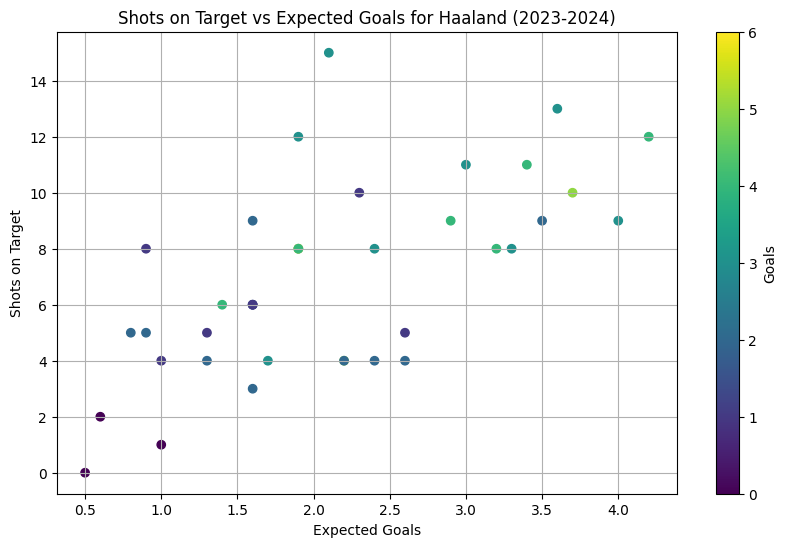

In [7]:
import pandas as pd

# Load the dataset from a CSV file
data = pd.read_csv('../data/cleaned/man_city_cleaned_shooting_2023_2024.csv')

# Add a unique match ID for each match (can be created from the row index or manually)
data['match_id'] = data.index + 1  # Match IDs will be unique and sequential

# Optionally, ensure that data types are correct for the visualization (e.g., converting date columns)
data['Date'] = pd.to_datetime(data['Date'])

# Preview the data to verify it's correct
print(data.head())

# Process the data for visualization
# You can adjust this depending on the visualization type you want (e.g., line plots, scatter plots)
# Example: Plotting Shots on Target vs. Expected Goals
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(data['Expected Goals'], data['Shots on Target'], c=data['Goals'], cmap='viridis', label='Shots on Target')
plt.colorbar(label='Goals')
plt.xlabel('Expected Goals')
plt.ylabel('Shots on Target')
plt.title('Shots on Target vs Expected Goals for Haaland (2023-2024)')
plt.grid(True)
plt.show()

# Saving processed data to a new CSV file with the added 'Match ID'
data.to_csv('haaland_shots_with_match_id.csv', index=False)


In [3]:
import pandas as pd


# Load the dataset from a CSV file
data = pd.read_csv('../data/cleaned/man_city_cleaned_shooting_2023_2024.csv')

# Add a unique match ID for each match (can be created from the row index or manually)
data['match_id'] = data.index + 1  # Match IDs will be unique and sequential

# Saving normalized data with Match ID to a new CSV file
data.to_csv('../data/normalized_data/man_city_shots_normalized_with_match_id.csv', index=False)
